In [1]:
from learningratefinder import LearningRateFinder

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [5]:
MIN_LR = 1e-5

In [6]:
model = create_model()
opt = tf.keras.optimizers.SGD(lr=MIN_LR, momentum=0.9)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 11s 180us/sample - loss: 2.3601 - accuracy: 0.1104
Epoch 2/2
44768/60000 [=====================>........] - ETA: 2s - loss: 1.1304 - accuracy: 0.6724

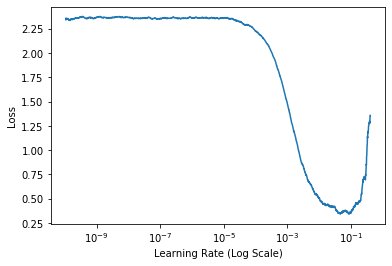

In [7]:
# initialize the learning rate finder and then train with learning
# rates ranging from 1e-10 to 1e+1
lrf = LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)
# plot the loss for the various learning rates and save the
# resulting plot to disk
lrf.plot_loss()


### based on:
https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/